In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")


In [7]:
# Generate circles dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42)

In [9]:
# Generate blobs dataset
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

In [13]:
# Generate moons dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

In [5]:
print(X)
print(X.shape)

[[-0.05146968  0.44419863]
 [ 1.03201691 -0.41974116]
 [ 0.86789186 -0.25482711]
 ...
 [ 1.68425911 -0.34822268]
 [-0.9672013   0.26367208]
 [ 0.78758971  0.61660945]]
(1000, 2)


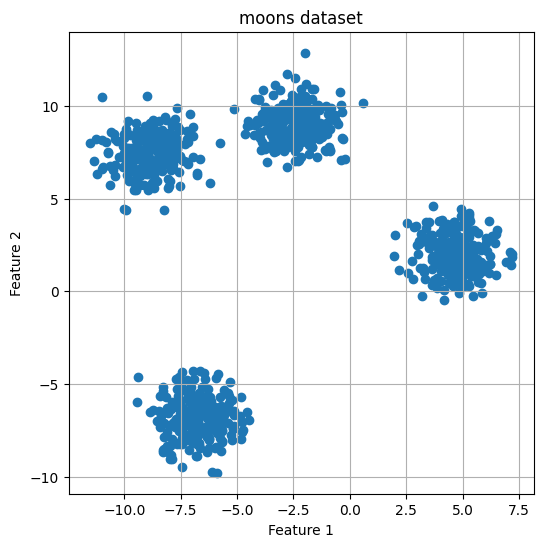

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.title("moons dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [11]:
def initialize_centroids(starting_points):
    centroids = np.array(starting_points)
    return centroids

def find_closest_centroids(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def compute_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i, :] = np.mean(X[labels == i, :], axis=0)
    return centroids

def kmeans(X, k, starting_points, max_iters=10):
    centroids = initialize_centroids(starting_points)
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    axes[0, 0].scatter(X[:, 0], X[:, 1], c='black', marker='o')
    axes[0, 0].set_title('Initial Data')
    for i in range(max_iters):
        labels = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, labels, k)
        row = (i + 1) // 3
        col = (i + 1) % 3
        axes[row, col].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        axes[row, col].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
        axes[row, col].set_title(f'Iteration {i+1}')
    plt.tight_layout()
    plt.show()
    return labels, centroids

starting_points = [[0, 0], [0, 0.5], [1, -1], [-1, -1]]


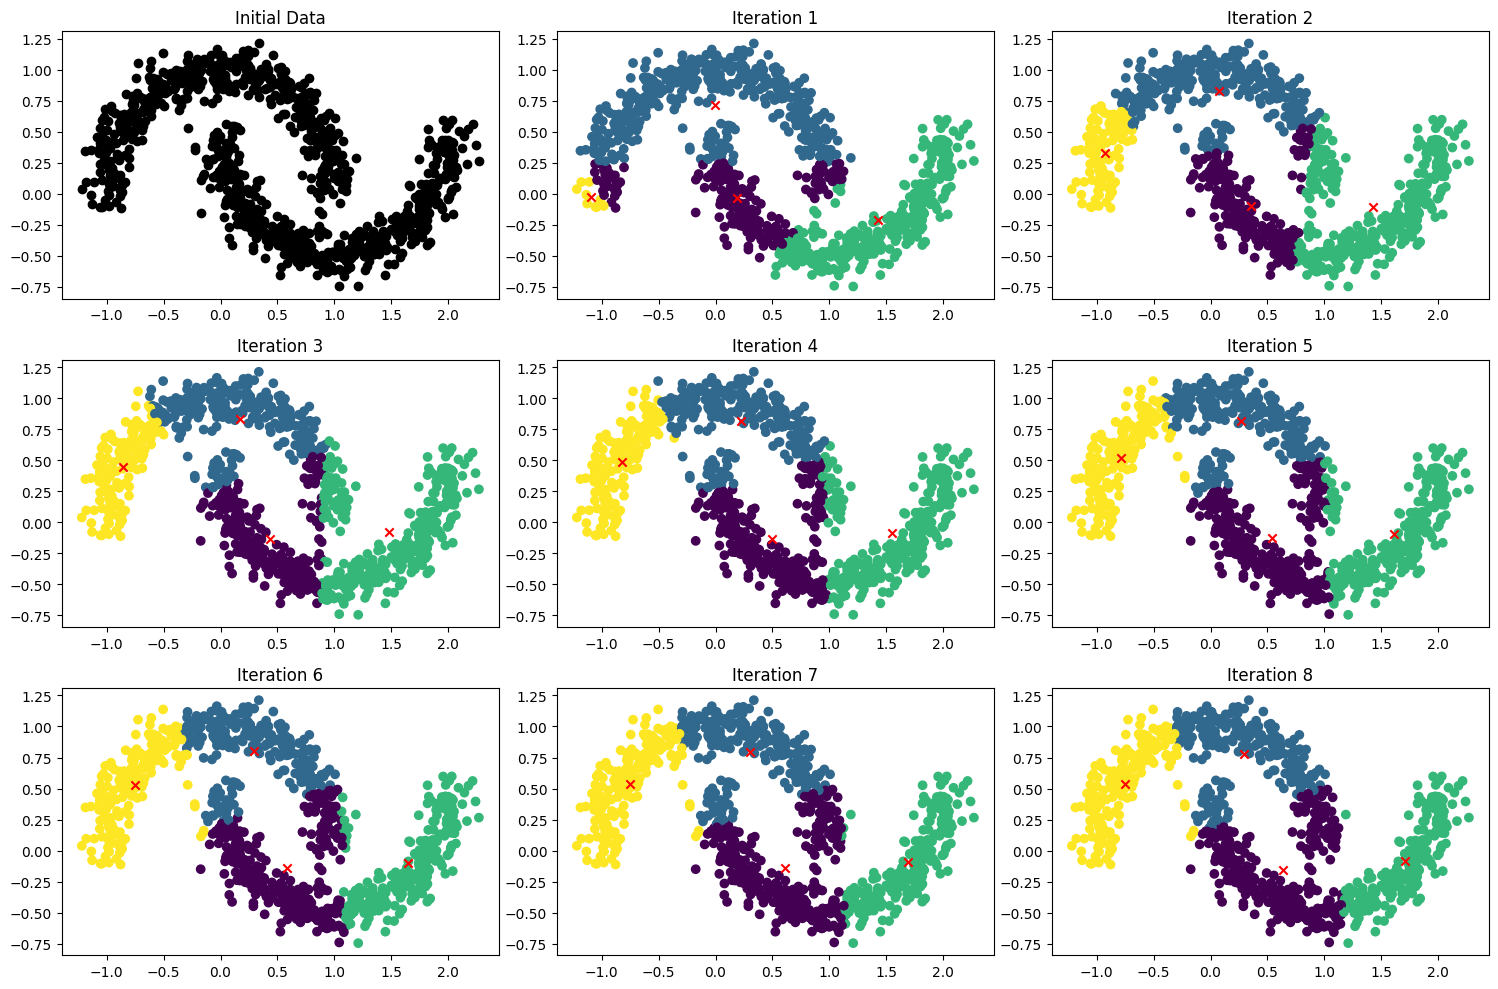

In [14]:
k = 4
starting_points = [[0, 0], [0, 0.5], [1, -1], [-1, -1]]
print("starting_points = [[0, 0], [0, 0.5], [1, -1], [-1, -1]]")
labels, centroids = kmeans(X, k, starting_points, max_iters=8)

# starting_points = [[-8, -5], [-5, 6], [0, 10], [0, 3]]
# print("starting_points = [[-8, -5], [-5, 6], [0, 10], [0, 3]]")
# labels, centroids = kmeans(X, k, starting_points, max_iters=8)